<img src="https://upload.wikimedia.org/wikipedia/fr/0/0b/Polytech_Lyon_logo.png" alt="drawing" height="200"/>

# Traitement de données & Programmation en Python
---



# TD 06

Traitement de données

Elements à consulter:





Doc                                   |             Link
--------------------------------------|------------------------------------
Github Helper      | [>link<](#scrollTo=Github_101)
Python en 30 jours | [>link<](https://moncoachdata.com/courses/apprendre-python-en-30-jours/)
Get started with pandas | [>link<](https://colab.research.google.com/notebooks/snippets/pandas.ipynb)

## Intro

Le premier bloc devrait toujours contenir les installs/imports dont on aura besoin pour le reste

In [211]:
# Installs
print("Python is awesome 👍")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Python is awesome 👍


## EX01
### Dataframes

* Importer la librairie pandas
* lire dataset 'tv_shows.csv' dans une variable tv_data
* Afficher les 10 premieres lignes du dataset
* Créer une colonne "sreaming_platform" qui contient le nom de la plateforme de streaming en se basant sur les colonnes (hulu, prime, disney, netflix)
* Drop les colonnes (hulu, prime, disney, netflix)
* Afficher le nombre de shows par plateforme de streaming
* Afficher la note moyenne (imdb) par plateforme de streaming
* Assigner a une variable top_shows, les meilleurs shows par plateforme de streaming et afficher cette dernière
> bonus 
* Faire un graphique avec le nombre de shows par année (sur Y, et sur l'axe X les années) par plateforme de streaming (en series). Libres sur le choix du graphique [help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

In [212]:
# Lire dataset dans la variable tv_data
filepath = "./tv_shows.csv"
tv_data = pd.read_csv(filepath)
tv_data = tv_data.dropna()

# Afficher les 1à premières lignes
print(tv_data[0:10])

   Unnamed: 0  ID                       Title  Year  Age    IMDb  \
0           0   1                Breaking Bad  2008  18+  9.4/10   
1           1   2             Stranger Things  2016  16+  8.7/10   
2           2   3             Attack on Titan  2013  18+  9.0/10   
3           3   4            Better Call Saul  2015  18+  8.8/10   
4           4   5                        Dark  2017  16+  8.8/10   
5           5   6  Avatar: The Last Airbender  2005   7+  9.3/10   
6           6   7              Peaky Blinders  2013  18+  8.8/10   
7           7   8            The Walking Dead  2010  18+  8.2/10   
8           8   9                Black Mirror  2011  18+  8.8/10   
9           9  10          The Queen's Gambit  2020  18+  8.6/10   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  
0         100/100        1     0            0        0     1  
1          96/100        1     0            0        0     1  
2          95/100        1     1            0        0     1  

In [213]:
# Créer une colonne streaming_platform contenant le nom des colonnes et drop les colonnes utilsées
# def platform(x):
#     res = []
#     if x["Netflix"] == 1:
#         res.append("Netflix")
#     if x["Hulu"] == 1:
#         res.append("Hulu")
#     if x["Prime Video"] == 1:
#         res.append("Prime Video")
#     if x["Disney+"] == 1:
#         res.append("Disney+")
#     return res
# tv_data["streaming_platform"] = tv_data.apply(lambda x: platform(x), axis=1)
# tv_data = tv_data.drop(columns=["Netflix", "Hulu", "Prime Video", "Disney+"])
# print(tv_data[0:10])

tv_data = pd.melt(
    tv_data, id_vars=['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Type'],
    value_vars=["Netflix", "Hulu", "Prime Video", "Disney+"],
    var_name="streaming_platform",
    value_name="is_on_platform"
)
tv_data = tv_data[tv_data.is_on_platform == 1]
tv_data.drop('is_on_platform', axis=1, inplace=True)
print(tv_data[0:10])
    


   ID                       Title  Year  Age    IMDb Rotten Tomatoes  Type  \
0   1                Breaking Bad  2008  18+  9.4/10         100/100     1   
1   2             Stranger Things  2016  16+  8.7/10          96/100     1   
2   3             Attack on Titan  2013  18+  9.0/10          95/100     1   
3   4            Better Call Saul  2015  18+  8.8/10          94/100     1   
4   5                        Dark  2017  16+  8.8/10          93/100     1   
5   6  Avatar: The Last Airbender  2005   7+  9.3/10          93/100     1   
6   7              Peaky Blinders  2013  18+  8.8/10          93/100     1   
7   8            The Walking Dead  2010  18+  8.2/10          93/100     1   
8   9                Black Mirror  2011  18+  8.8/10          92/100     1   
9  10          The Queen's Gambit  2020  18+  8.6/10          92/100     1   

  streaming_platform  
0            Netflix  
1            Netflix  
2            Netflix  
3            Netflix  
4            Netflix  
5  

In [214]:
# Afficher le nombre de show par plateforme de streaming
count_tv_shows = tv_data.groupby(['streaming_platform'])['streaming_platform'].count()
print(count_tv_shows)

streaming_platform
Disney+         257
Hulu           1212
Netflix        1329
Prime Video     750
Name: streaming_platform, dtype: int64


In [223]:
# Afficher la note moyenne (imdb) par plateforme de streaming
tv_data[["Note", "to_delete"]] = tv_data["IMDb"].str.split("/", expand=True)
tv_data = tv_data.astype({"Note": "float"})
tv_data.drop("to_delete", axis=1, inplace=True)

avg_note_by_platform = tv_data.groupby(['streaming_platform'])["Note"].mean()
print(avg_note_by_platform)


streaming_platform
Disney+        6.917510
Hulu           7.129125
Netflix        7.154477
Prime Video    7.267333
Name: Note, dtype: float64


In [227]:
# Assigner a une variable top_shows, les meilleurs shows par plateforme de streaming et afficher cette dernière
top_shows = tv_data.groupby(['streaming_platform'])['Note'].transform(max) == tv_data['Note']
print(tv_data[top_shows])

         ID                              Title  Year  Age    IMDb  \
0         1                       Breaking Bad  2008  18+  9.4/10   
4582   2034                             Cosmos  2014  all  9.3/10   
9139   4054  The Secret World of Nature: Spain  2020   7+  9.6/10   
12628  5401                              Bluey  2018  all  9.6/10   

      Rotten Tomatoes  Type streaming_platform  Note  
0             100/100     1            Netflix   9.4  
4582           82/100     1               Hulu   9.3  
9139           51/100     1        Prime Video   9.6  
12628          71/100     1            Disney+   9.6  


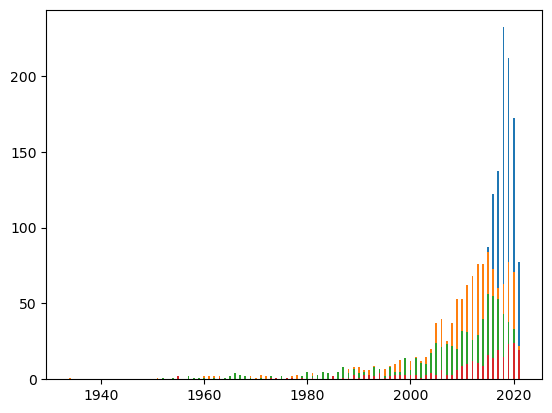

In [239]:
# Faire un graphique avec le nombre de shows par année (sur Y, et sur l'axe X les années) par plateforme de streaming (en series).
# Libres sur le choix du graphique [help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)
labels = tv_data["Year"].sort_values(ascending=True).unique()
nbr = tv_data.groupby(["streaming_platform", "Year"])["ID"].count()

x_netflix = list(nbr["Netflix"].index)
x_hulu = list(nbr["Hulu"].index)
x_prime_video = list(nbr["Prime Video"].index)
x_disney = list(nbr["Disney+"].index)

width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rect_netflix = ax.bar(x_netflix, nbr["Netflix"].tolist(), width, label='Netflix')
rect_hulu = ax.bar(x_hulu, nbr["Hulu"].tolist(), width, label='Hulu')
rect_prime_video = ax.bar(x_prime_video, nbr["Prime Video"].tolist(), width, label='Prime Video')
rect_disney = ax.bar(x_disney, nbr["Disney+"].tolist(), width, label='Disney+')

# ax.set_ylabel('Nombre de série')
# ax.set_title('Nombre de série par année et par plateforme')
# ax.set_xticks(x_netflix, labels)
# ax.legend()

# ax.bar_label(rect_netflix, padding=3)
# ax.bar_label(rect_hulu, padding=3)
# ax.bar_label(rect_prime_video, padding=3)
# ax.bar_label(rect_disney, padding=3)

# fig.tight_layout()

plt.show()

Year  streaming_platform
1934  Hulu                   1
1951  Hulu                   1
1952  Prime Video            1
1954  Prime Video            1
1955  Disney+                2
                            ..
2020  Prime Video           33
2021  Disney+               19
      Hulu                  22
      Netflix               77
      Prime Video           10
Name: streaming_platform, Length: 208, dtype: int64


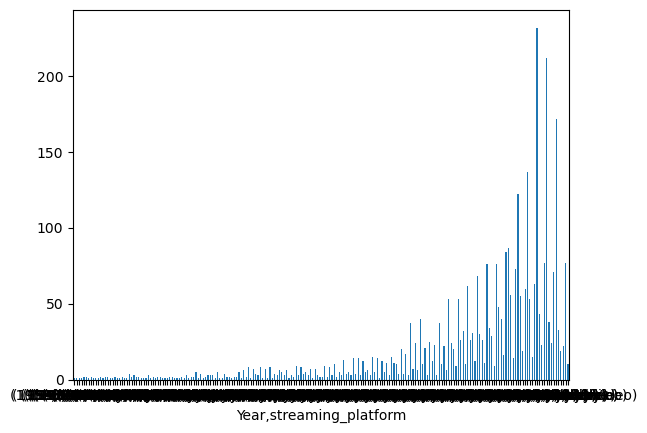

In [254]:
new_df = tv_data.groupby(["Year", "streaming_platform"], group_keys=False)["streaming_platform"].count().apply(lambda x: x)
print(new_df)

ax = new_df.plot.bar(rot=0)

##EX02
### Pandas Power

TBD (apres la pause)

In [189]:
# Code here
